# import packages.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Check the contents of the file.

In [2]:
train_data = pd.read_csv('~/input/titanic/train.csv')
test_data = pd.read_csv('~/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Analyze data.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Homer, Mr. Harry (""Mr E Haven"")",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
test_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ismay, Mr. Joseph Bruce",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##  Pclass

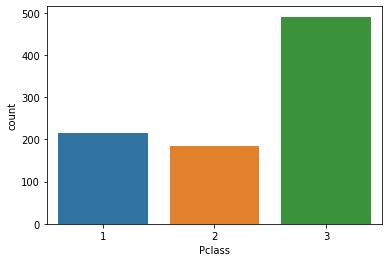

In [11]:
sns.countplot(train_data['Pclass'])

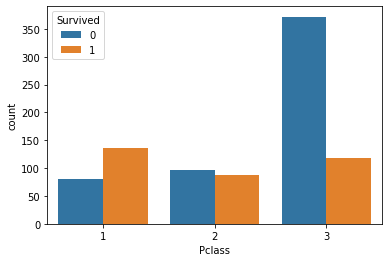

In [12]:
sns.countplot(x='Pclass', data=train_data, hue='Survived')

## Sex

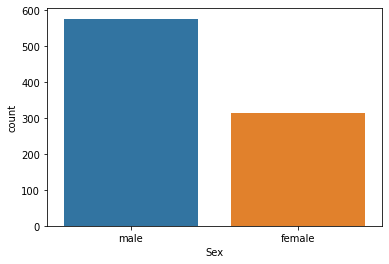

In [13]:
sns.countplot(train_data['Sex'])

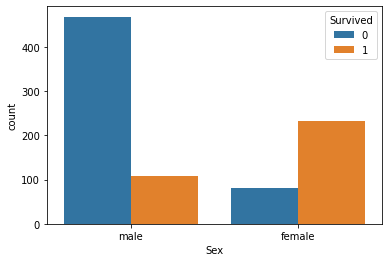

In [14]:
sns.countplot(x='Sex', data=train_data, hue='Survived')

## Age

In [15]:
age_filled_data = train_data.fillna({'Age': 99})

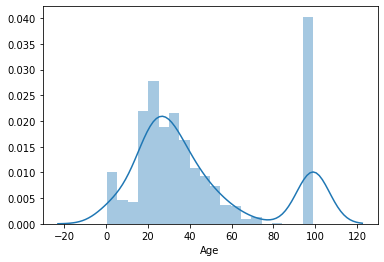

In [16]:
sns.distplot(age_filled_data['Age'], bins=20)

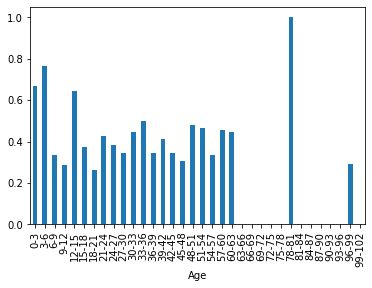

In [17]:
# Binning ages every 5 years
bin_age = 3
age_bins_list = [-1] + list(range(bin_age, 103, bin_age))
age_bins_label = [ "{0}-{1}".format(age, age + bin_age) for age in list(range(0, 100,bin_age)) ]
age_bins = pd.cut(age_filled_data['Age'],  bins=age_bins_list, labels=age_bins_label)

# Group by age and calculate average
age_grouped_data = age_filled_data.groupby(age_bins).mean()
age_grouped_data['Survived'].plot(kind='bar')

In [18]:
#left = age_grouped_data.index
#height = age_grouped_data['Survived']
#plt.xlabel('Age')
#plt.ylabel('Survival rate')
#plt.bar(left, height)

## SibSp (Number of siblings / spouses aboard the Titanic)

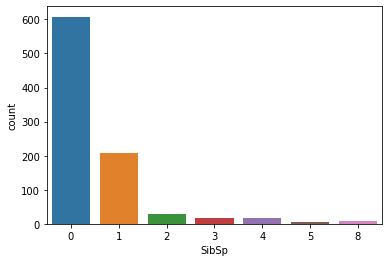

In [19]:
sns.countplot(train_data['SibSp'])

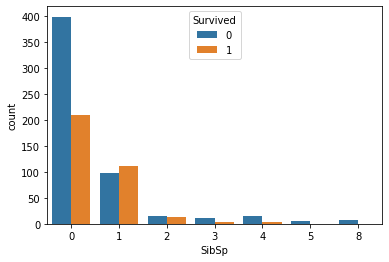

In [20]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')

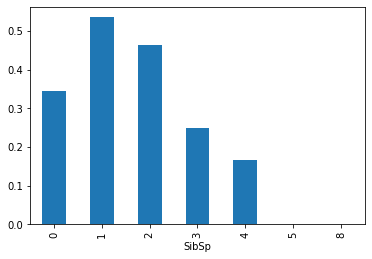

In [21]:
sibsp_mean = train_data.groupby('SibSp').mean()
sibsp_mean['Survived'].plot(kind='bar')

## Parch (Number of parents / children aboard the Titanic)

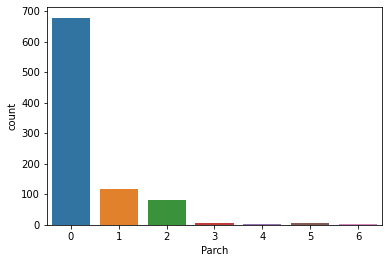

In [22]:
sns.countplot(train_data['Parch'])

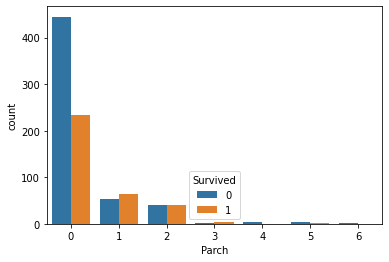

In [23]:
sns.countplot(x='Parch', data=train_data, hue='Survived')

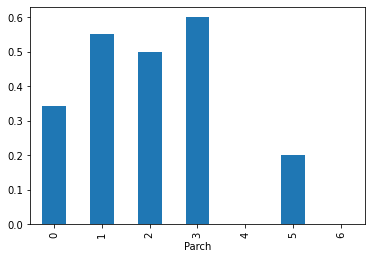

In [24]:
parch_mean = train_data.groupby('Parch').mean()
parch_mean['Survived'].plot(kind='bar')

## Passenger fare

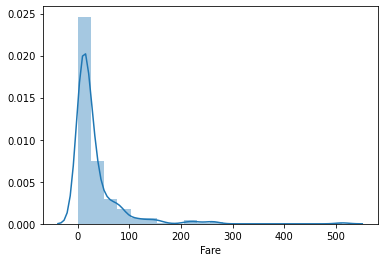

In [25]:
sns.distplot(train_data['Fare'], bins=20)

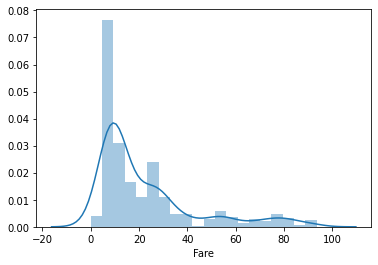

In [26]:
low_fare_data = train_data[train_data['Fare'] < 100]
sns.distplot(low_fare_data['Fare'], bins=20)

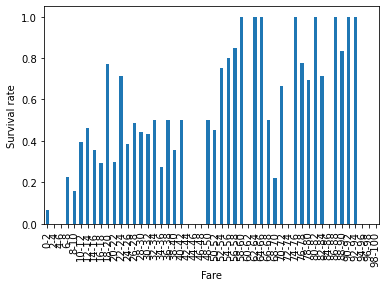

In [27]:
# Binning fare every 5
bin_fare = 2
fare_bins_list =  [-1] + list(range(bin_fare, 101, bin_fare))
fare_bins_label_list =  list(range(0, 100, bin_fare))
fare_bins_label = [ '{0}-{1}'.format(fare, fare + bin_fare) for fare in (fare_bins_label_list) ]
fare_bins = pd.cut(train_data['Fare'],  bins=fare_bins_list, labels=fare_bins_label)

# Group by Fare and calculate average
fare_grouped_data = train_data.groupby(fare_bins).mean()
plt.ylabel('Survival rate')
fare_grouped_data['Survived'].plot(kind='bar')

## Embarked

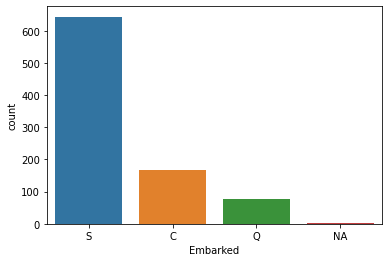

In [28]:
embarked_fillna_data = train_data.fillna({'Embarked': 'NA'})
sns.countplot(embarked_fillna_data['Embarked'])

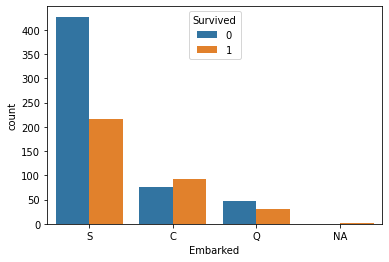

In [29]:
sns.countplot(x='Embarked', data=embarked_fillna_data, hue='Survived')

# Analyze relationship between parameters

## Pclass and Sex

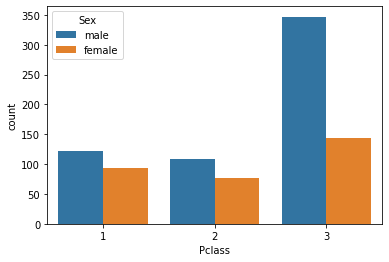

In [30]:
sns.countplot(x='Pclass', data=train_data, hue='Sex')

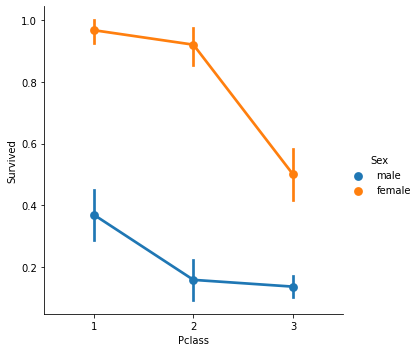

In [31]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', data=train_data, kind='point')

## Pclass and Age

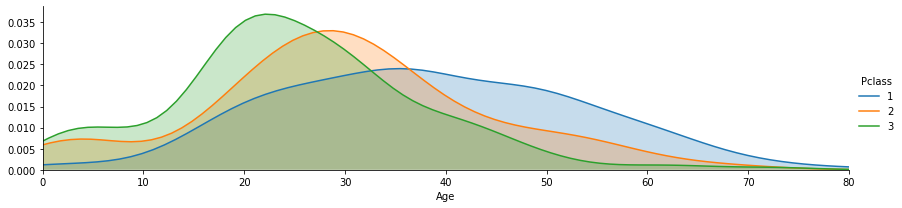

In [32]:
grid = sns.FacetGrid(train_data, hue='Pclass', aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

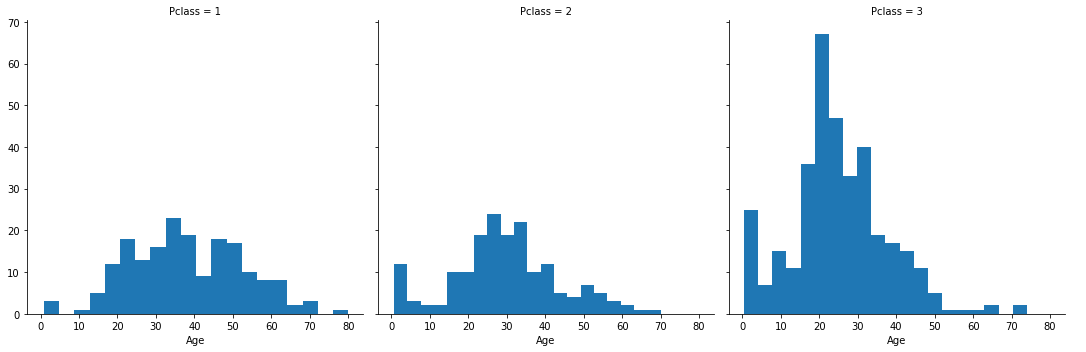

In [33]:
grid = sns.FacetGrid(train_data, col='Pclass', height=5)
grid.map(plt.hist, 'Age',  bins=20)
grid.add_legend()

## Pclass and SibSp

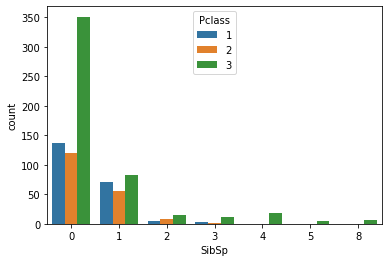

In [34]:
sns.countplot(x='SibSp', data=train_data, hue='Pclass')

## Pclass ans Parch

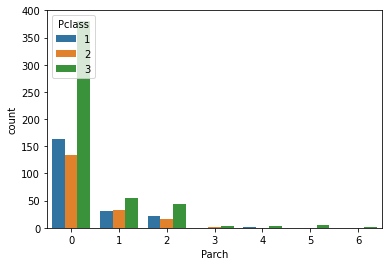

In [35]:
sns.countplot(x='Parch', data=train_data, hue='Pclass')

## Pclass and Fare

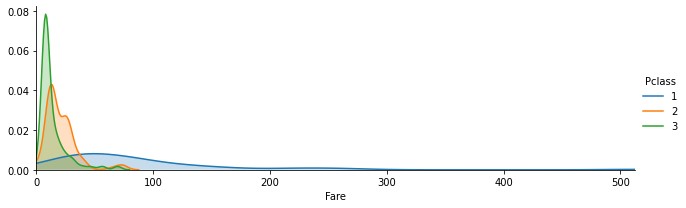

In [36]:
grid = sns.FacetGrid(train_data, hue='Pclass', height=3, aspect=3)
grid.map(sns.kdeplot,'Fare',shade= True)
max_fare = train_data['Fare'].max()
grid.set(xlim=(0, max_fare))
grid.add_legend()

## Sex and Age

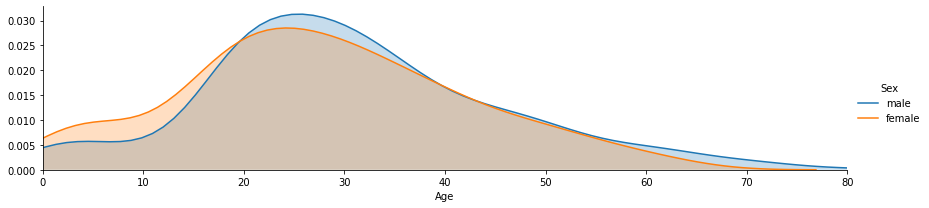

In [37]:
grid = sns.FacetGrid(train_data, hue='Sex', aspect=4)
grid.map(sns.kdeplot,'Age',shade= True)
max_age = train_data['Age'].max()
grid.set(xlim=(0, max_age))
grid.add_legend()

## SibSp and Parch

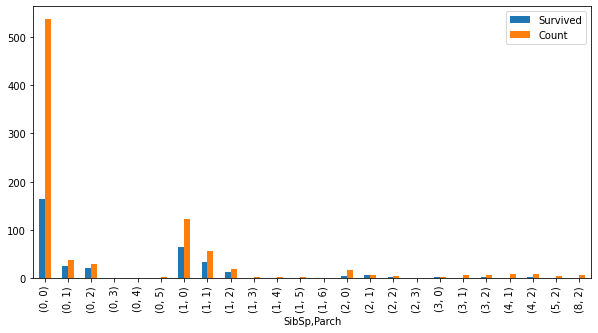

In [38]:
sibsp_parch_group = train_data.groupby(['SibSp', 'Parch'])
survived = sibsp_parch_group['Survived'].sum()
count = sibsp_parch_group['Survived'].count()

sibsp_parch_count = pd.DataFrame(index=survived.index)
sibsp_parch_count['Survived'] = survived
sibsp_parch_count['Count'] = count
sibsp_parch_count.plot.bar(figsize=(10, 5))

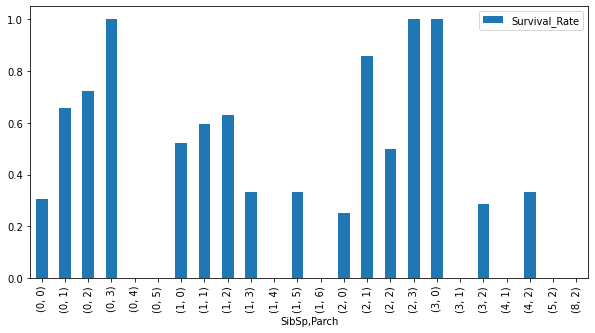

In [39]:
sibsp_parch_rate = pd.DataFrame(index=survived.index)
sibsp_parch_rate['Survival_Rate'] = survived / count
sibsp_parch_rate.plot.bar(figsize=(10, 5))

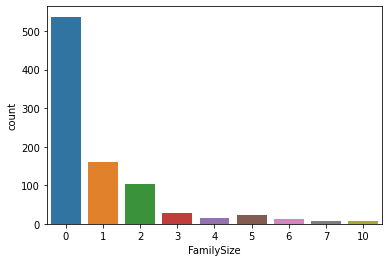

In [40]:
family_size_data = pd.DataFrame(index=train_data.index)
family_size_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
family_size_data['Survived'] = train_data['Survived']

sns.countplot(family_size_data['FamilySize'])

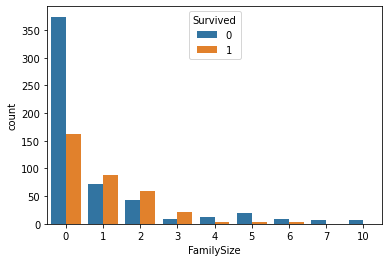

In [41]:
sns.countplot(x='FamilySize', data=family_size_data, hue='Survived')

# Check the importance of features

## Convert categorical variables

In [42]:
from sklearn.preprocessing import LabelEncoder

train_all = train_data.copy()
test_all = test_data.copy()

train_all.fillna({'Age': 99, 'Ticket': 'Na', 'Fare': 999, 'Cabin': 'Na', 'Embarked': 'Na'}, inplace=True)
test_all.fillna({'Age': 99, 'Ticket': 'Na', 'Fare': 999, 'Cabin': 'Na', 'Embarked': 'Na'}, inplace=True)

#train_x['Test'] = 0
#test_x['Test'] = 1

all_data = pd.concat([train_all, test_all])

for column in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    #print(column)
    encoder = LabelEncoder()
    encoder.fit(all_data[column])
    #all_data[column] = encoder.transform(all_data[column])
    train_all[column] = encoder.transform(train_all[column])
    test_all[column] = encoder.transform(test_all[column])
    
#all_data.info()
#all_data.head(10)
#train_all.head(10)

## Predict using all input data

Score:0.81


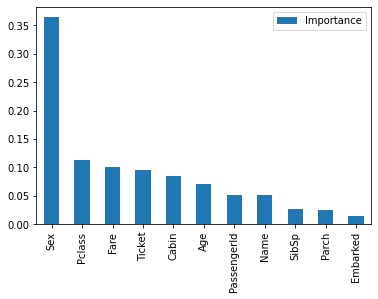

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import log_loss, accuracy_score

train_y = train_all['Survived']
train_x = train_all.drop(columns=['Survived'])
test_x = test_all

#for train_index, test_index in kf.split(train_x):
#    tr_x, tr_y = train_x.iloc[train_index], train_y.iloc[train_index]
#    ts_x, ts_y = train_x.iloc[test_index], train_y.iloc[test_index]
#    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#    model.fit(tr_x, tr_y)
#    ts_pred = model.predict(ts_x)
#    score = accuracy_score(ts_y, ts_pred)
#    print(score)
    
# Trainning with cross validation and and score calculation
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
kf = KFold(n_splits=5, shuffle=True, random_state=3)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.2f}'.format(result.mean()))

# Evaluation of features
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

# Creating features

In [44]:
train_data = pd.read_csv('~/input/titanic/train.csv')
test_data = pd.read_csv('~/input/titanic/test.csv')

train_all = train_data.copy()
test_all = test_data.copy()

train_all['Test'] = 0
test_all['Test'] = 1
test_all['Survived'] = -1

all_data = pd.concat([train_all, test_all])
#all_data.info()

## Age -> Generation

In [45]:
def generations(age):
    if age <= 6: return 0
    if age <= 18: return 1
    if age <= 60: return 2
    return 3
    
#all_data['Child'] = all_data['Age'] < 7
all_data['Generation'] = all_data['Age'].map(lambda age : generations(age))

## Fare -> FareRange

In [46]:
def fare_range(fare):
    if fare < 10: return 0
    if fare < 50: return 1
    return 2

all_data['FareRange'] = all_data['Fare'].map(lambda fare : fare_range(fare))

## SibSp, Parch -> Family Size

In [47]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] 

def family_size(fsize):
    if fsize == 0: return 0
    if fsize <= 3: return 1
    return 2

all_data['FamilySize'] = all_data['FamilySize'].map(lambda fsize : family_size(fsize))

## Embarked > Embarked2

In [48]:
all_data.fillna({'Embarked': 'Na'}, inplace=True)
all_data['Embarked2'] = all_data['Embarked'] .replace({'C':0, 'Q': 1, 'S': 2, 'Na': 3})
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test,Generation,FareRange,FamilySize,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,0,2


##

In [49]:
all_data.fillna({'Age': 99, 'Ticket': 'Na', 'Fare': 999, 'Cabin': 'Na', 'Embarked': 'Na'}, inplace=True)

for column in ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    encoder = LabelEncoder()
    encoder.fit(all_data[column])
    all_data[column] = encoder.transform(all_data[column])
    

Score:0.82


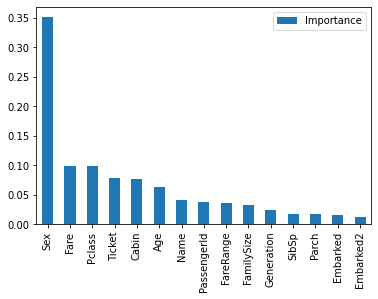

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

test_group = all_data.groupby('Test')
train_y = test_group.get_group(0)['Survived']
train_x = test_group.get_group(0).drop(columns=['Survived', 'Test'])
test_x = test_group.get_group(1).drop(columns=['Survived', 'Test'])
#train_x = test_group.get_group(0).drop(columns=['Survived', 'Test', 'Age', 'SibSp', 'Parch', 'Embarked'])
#test_x = test_group.get_group(1).drop(columns=['Survived', 'Test', 'Age', 'SibSp', 'Parch', 'Embarked'])
    
# Trainning with cross validation and and score calculation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.2f}'.format(result.mean()))

# Evaluation of features
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

Score:0.81


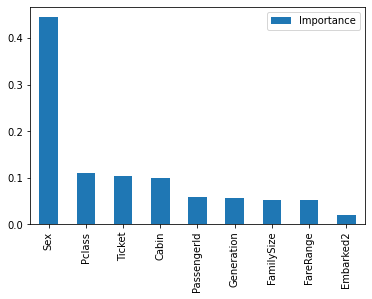

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

test_group = all_data.groupby('Test')
train_y = test_group.get_group(0)['Survived']
#drop_columns = ['Survived', 'Test', 'Cabin', 'Age', 'Ticket', 'Name', 'PassengerId', 'FareRange', 'FamilySize', 'Generation', 'SibSp', 'Parch', 'Embarked', 'Embarked2']
drop_columns = ['Survived', 'Test', 'Name', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
train_x = test_group.get_group(0).drop(columns=drop_columns)
test_x = test_group.get_group(1).drop(columns=drop_columns)
    
# Trainning with cross validation and and score calculation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
result = cross_val_score(model, train_x, train_y, cv=kf, scoring='accuracy')
print('Score:{0:.2f}'.format(result.mean()))

# Evaluation of features
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_x, train_y)

importances = model.feature_importances_
columns = train_x.columns

feature_importances = pd.DataFrame(importances, index=train_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.plot.bar()

In [55]:
## Fare -> Low Fare



#score=log_loss(va_y,va_pred)

# Prediction
predictions = model.predict(test_x)

# Output result to csv.
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")